<a href="https://colab.research.google.com/github/rachel1234561/ds2002project/blob/main/analysis_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/rachel1234561/ds2002project/blob/main/analysis_vizulizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualizations**
### The first section visualizes college scorecard data, which is organized by institution and other variables.
### The second part visualizes American Community Survey data, which describes median earnings based on education.
### The final section is our analysis which combines both data sets to explore how graduate vs non-graduate income compares based on state and education level.

### **College Scorecard Visualizations**

In [ ]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotnine import *

In [ ]:
!git clone https://github.com/rachel1234561/ds2002project.git

Cloning into 'ds2002project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 128.11 KiB | 1001.00 KiB/s, done.


In [ ]:
data = pd.read_csv('college_data_clean.csv')
data=data.drop('degree_type',axis=1)
variables = data.columns.tolist()
variables

['id',
 'name',
 'zip',
 'city',
 'state',
 'acceptance_rate',
 'part_time',
 'debt',
 'pell_grant',
 'stud_fac_ratio',
 'percent_loans',
 'graduation_rate',
 'yearly_cost',
 'student_pop',
 'earnings',
 'school_type',
 'region',
 'average_act',
 'precent_female',
 'average_income']

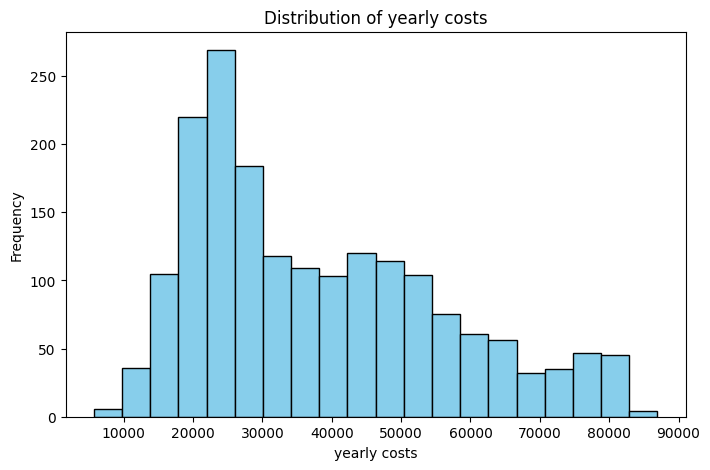

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(data['yearly_cost'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of yearly costs')
plt.xlabel('yearly costs')
plt.ylabel('Frequency')
plt.show()

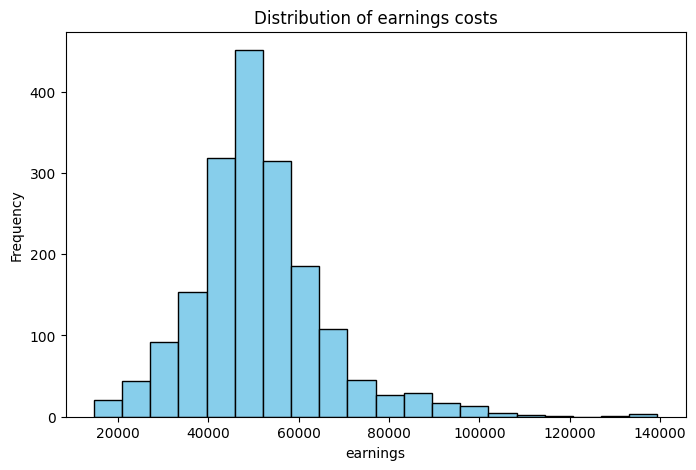

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(data['earnings'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of earnings')
plt.xlabel('earnings')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data['yearly_cost'] = pd.to_numeric(data['yearly_cost'], errors='coerce')
data['earnings'] = pd.to_numeric(data['earnings'], errors='coerce')

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 292 rows containing missing values.


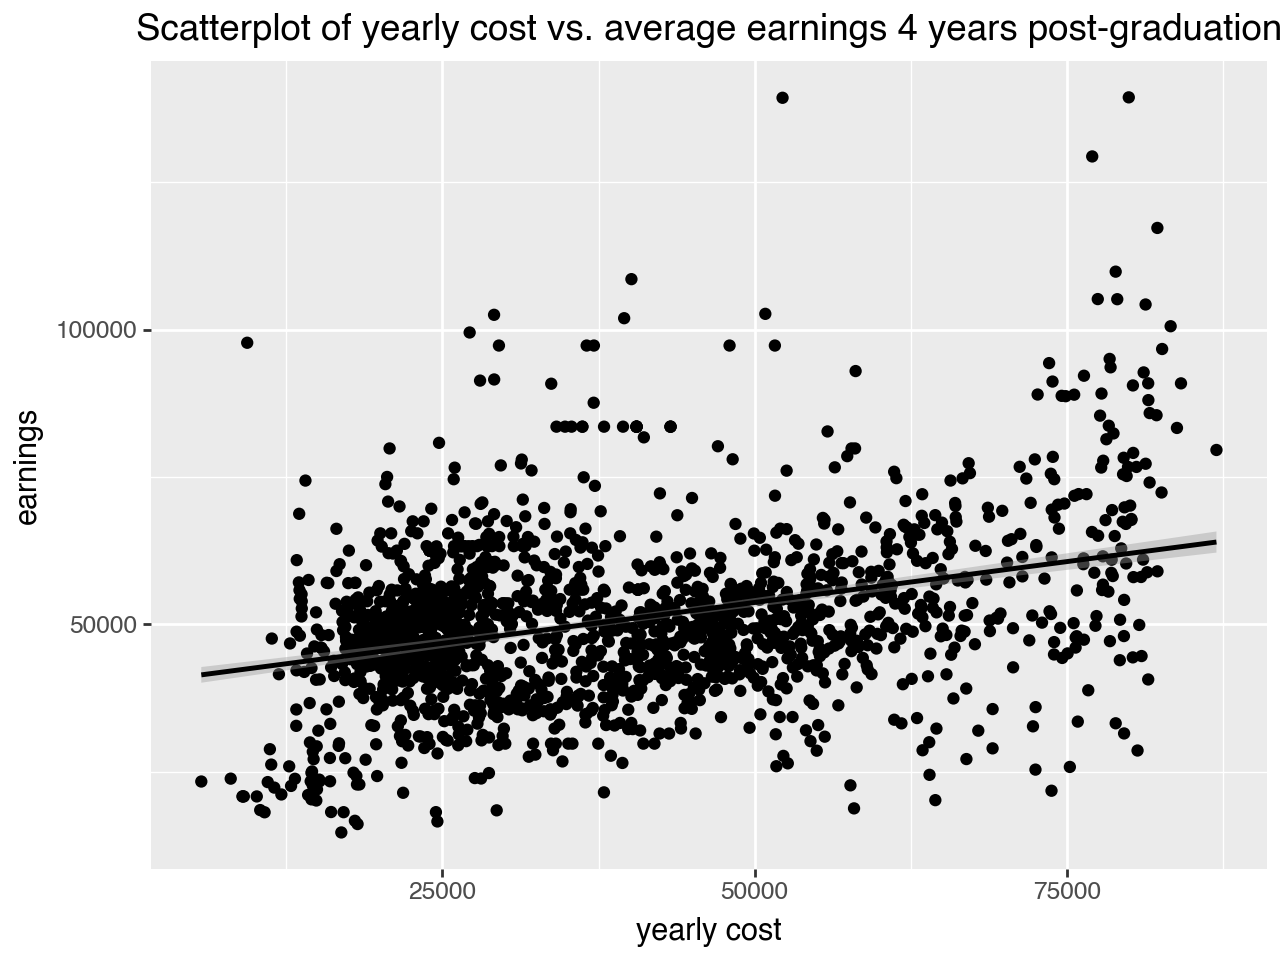

In [ ]:
# Create a scatterplot to compare post-graduation earnings and cost of college attendance.
ggplot(data,aes(x='yearly_cost',y='earnings'))+geom_point()+geom_smooth()+labs(title='Scatterplot of yearly cost vs. average earnings 4 years post-graduation',x='yearly cost')

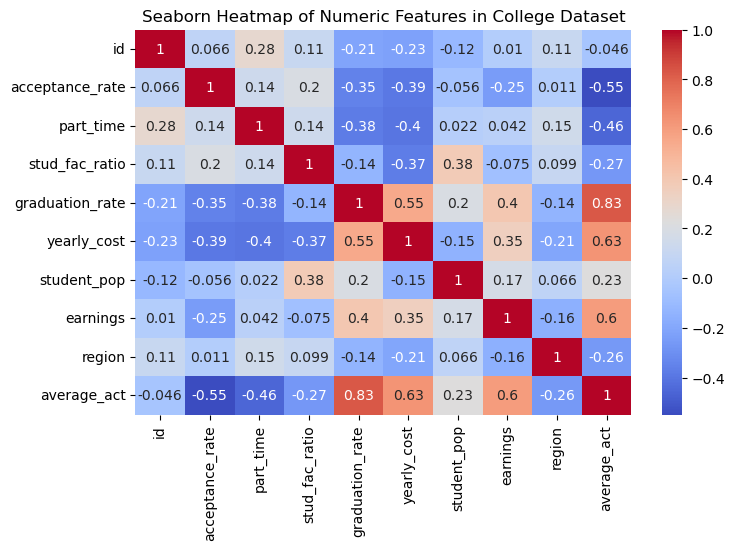

In [ ]:

# Compute the correlation matrix using only numeric columns
numeric_vars = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_vars.corr()

# Create a heatmap to assess relationships between factors
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Seaborn Heatmap of Numeric Features in College Dataset')
plt.show()

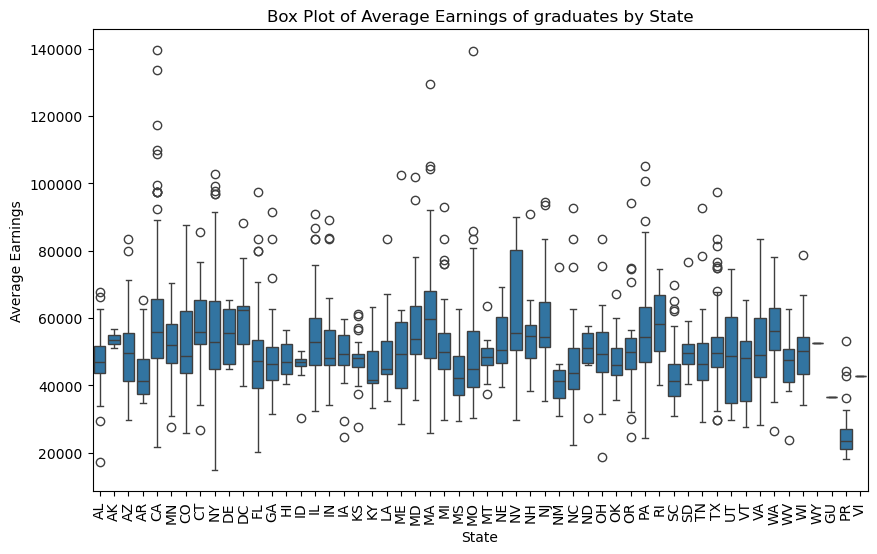

In [ ]:
# Create a box plot showing average earnings by state
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='earnings', data=data)
plt.title('Box Plot of Average Earnings of graduates by State')
plt.xlabel('State')
plt.ylabel('Average Earnings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### **American Community Survey Visualizations**

In [ ]:
earnings_edu = pd.read_csv("state_earnings.csv")
earnings_edu.set_index('State', inplace=True)

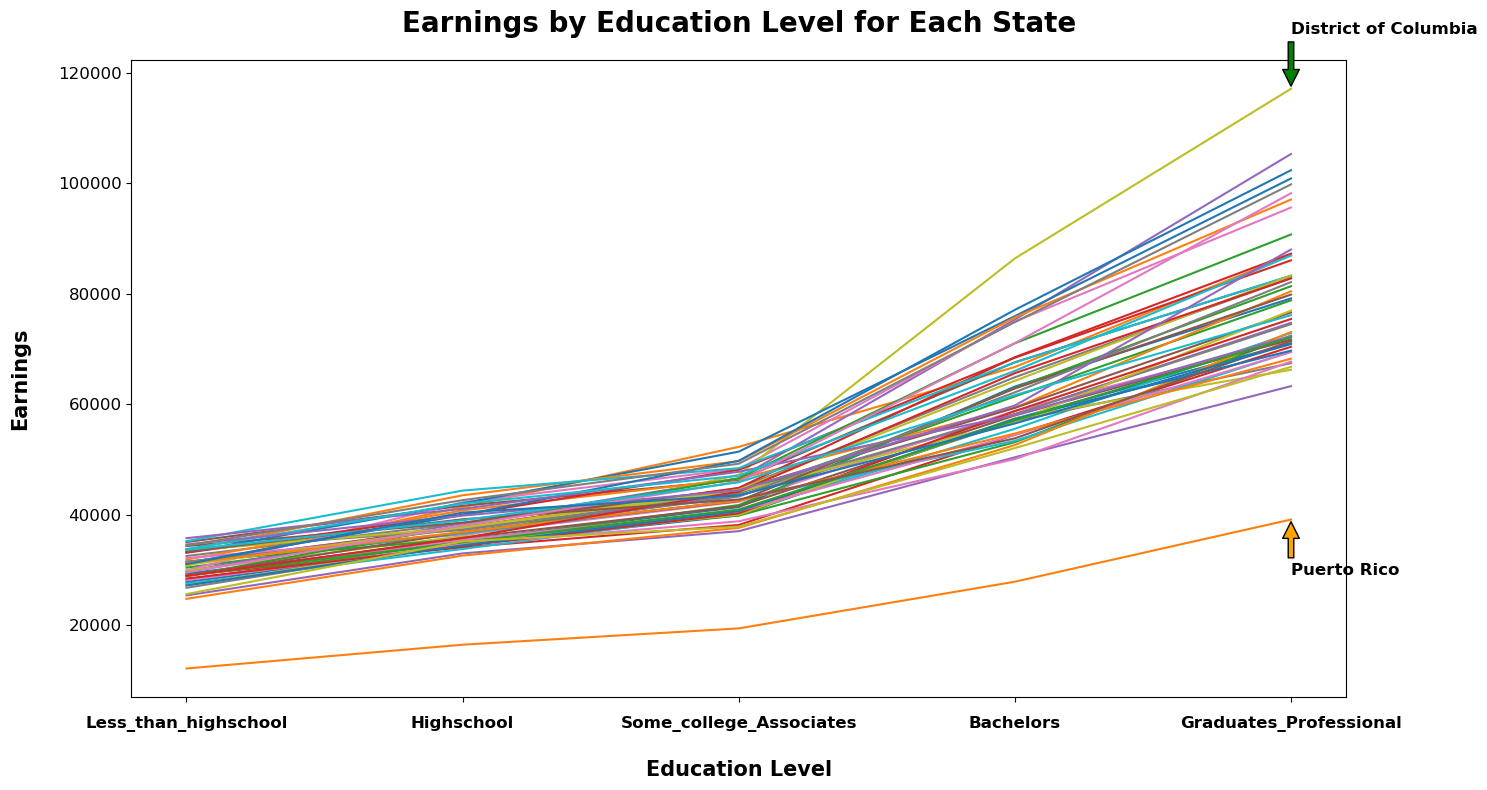

In [ ]:
earnings_edu_no_median = earnings_edu.drop(columns=['MedianEarnings'])
transposed = earnings_edu_no_median.transpose()
max_grad_state = earnings_edu['Graduates_Professional'].idxmax()
min_grad_state = earnings_edu['Graduates_Professional'].idxmin()
plt.figure(figsize=(15, 8))
for state in transposed.columns:
    plt.plot(transposed.index, transposed[state], label=state)
max_grad_earnings = earnings_edu.loc[max_grad_state, 'Graduates_Professional']
min_grad_earnings = earnings_edu.loc[min_grad_state, 'Graduates_Professional']
plt.annotate(max_grad_state,
             xy=('Graduates_Professional', max_grad_earnings),
             xytext=('Graduates_Professional', max_grad_earnings + 10000),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12, weight='bold')
plt.annotate(min_grad_state,
             xy=('Graduates_Professional', min_grad_earnings),
             xytext=('Graduates_Professional', min_grad_earnings - 10000),
             arrowprops=dict(facecolor='orange', shrink=0.05),
             fontsize=12, weight='bold')
#Create lineplot showing earnings by education level by state
plt.title('Earnings by Education Level for Each State', fontsize = 20, weight = "bold", pad = 20)
plt.xlabel('Education Level', fontsize = 15, weight = "bold", labelpad = 20)
plt.ylabel('Earnings', fontsize = 15, weight = "bold", labelpad = 20)
plt.xticks(fontsize = 12, weight = "bold")
plt.yticks(fontsize = 12)
#plt.legend(title='State', loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().tick_params(axis='x', pad=10)
plt.tight_layout()
plt.show()

### **Combined**